**VGG16 (Imported, No Pretraining) on MNIST**

In [ ]:
# Step 1: Imports
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# Step 2: Load & Preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand grayscale to 3 channels (28x28x1 → 28x28x3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)

# Resize to VGG16 input size (typically 224x224, but can also use 32x32 to save resources)
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Step 3: Define Model Using VGG16 (No Pretrained Weights)
base_model = VGG16(
    include_top=False,  # We'll add our own classification head
    weights=None,       # No pretrained weights
    input_shape=(32, 32, 3)
)

# Freeze nothing — we're training from scratch
base_model.trainable = True

# Add custom head
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # 10 classes for MNIST
])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 1, 1, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,586 (56.64 MB)

 Trainable params: 14,848,586 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compile the Model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)



In [ ]:
# Step 5: Train the Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5
422/422 - 62s - 147ms/step - accuracy: 0.1122 - loss: 2.3017 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 2/5
422/422 - 55s - 131ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 3/5
422/422 - 41s - 98ms/step - accuracy: 0.1132 - loss: 2.3014 - val_accuracy: 0.1050 - val_loss: 2.3019
Epoch 4/5
422/422 - 41s - 98ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3020
Epoch 5/5
422/422 - 41s - 97ms/step - accuracy: 0.1132 - loss: 2.3013 - val_accuracy: 0.1050 - val_loss: 2.3019


In [ ]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy: {:.2f}%".format(test_acc * 100))


Test Accuracy: 11.35%


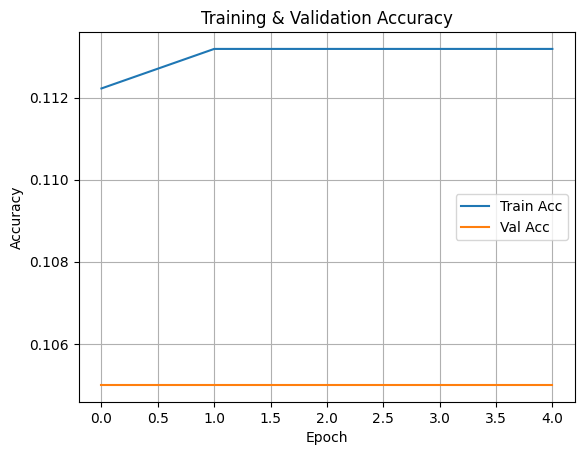

In [ ]:
# Step 7: Plot Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

VGG16 was built for 224x224 inputs.

When using 32x32:

Aggressive max pooling shrinks the spatial size too quickly.

May lead to empty or meaningless feature maps.

After block1 → 16x16

After block2 → 8x8

After block3 → 4x4

After block4 → 2x2

After block5 → 1x1



**VGG16 (modified) on MNIST (from scratch)**

In [ ]:
# Step 1: Install & Import Libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


In [ ]:
# Step 2: Load and Preprocess MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize and reshape
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand grayscale to 3 channels to match VGG input (28x28x3)
x_train = np.stack((x_train,) * 3, axis=-1)
x_test = np.stack((x_test,) * 3, axis=-1)

# Optionally, resize to 32x32x3 (VGG16 input size is typically 224x224, but we'll use 32x32 to save time)
x_train = tf.image.resize(x_train, [32, 32])
x_test = tf.image.resize(x_test, [32, 32])

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("Training set shape:", x_train.shape)
print("Test set shape:", x_test.shape)

Training set shape: (60000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)


In [ ]:
# Step 3: Build VGG16-like Model (from scratch, no pretrained weights)
def build_vgg16():
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))  # 10 classes for MNIST

    return model

model = build_vgg16()
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 8, 8, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       262,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,100,938 (15.64 MB)

 Trainable params: 4,100,938 (15.64 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Step 4: Compile Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 5: Train Model
history = model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1,
    verbose=2
)

Epoch 1/5
422/422 - 26s - 60ms/step - accuracy: 0.9006 - loss: 0.2990 - val_accuracy: 0.9818 - val_loss: 0.0625
Epoch 2/5
422/422 - 32s - 76ms/step - accuracy: 0.9830 - loss: 0.0654 - val_accuracy: 0.9920 - val_loss: 0.0337
Epoch 3/5
422/422 - 14s - 33ms/step - accuracy: 0.9865 - loss: 0.0490 - val_accuracy: 0.9917 - val_loss: 0.0339
Epoch 4/5
422/422 - 20s - 48ms/step - accuracy: 0.9899 - loss: 0.0381 - val_accuracy: 0.9923 - val_loss: 0.0283
Epoch 5/5
422/422 - 21s - 49ms/step - accuracy: 0.9910 - loss: 0.0318 - val_accuracy: 0.9930 - val_loss: 0.0285


In [ ]:
# Step 6: Evaluate on Test Set
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy: {:.2f}%".format(test_acc * 100))


Test Accuracy: 99.29%


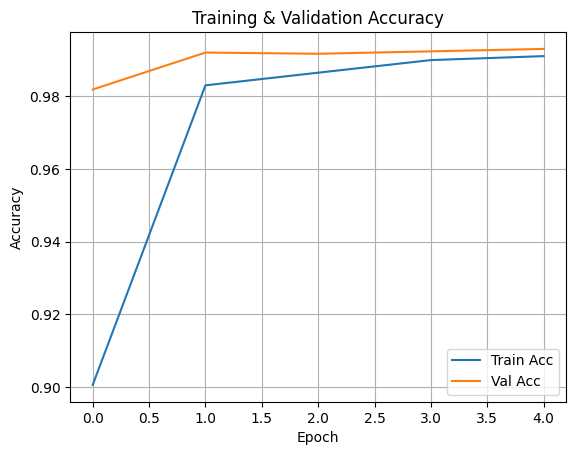

In [ ]:
# Step 7: Plot Training History (Optional)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Training & Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()